<a href="https://colab.research.google.com/github/CrushedKatana/Machine_Learning/blob/main/JS05_2341720205_Charellino_Kalingga_Sadewo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 1

### Step 1 - Import *Library*

In [131]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Step 2 - Load Data and Inspection

In [132]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Step 3 - Features Selection

In [134]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

In [135]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


### Step 4 - Plotting

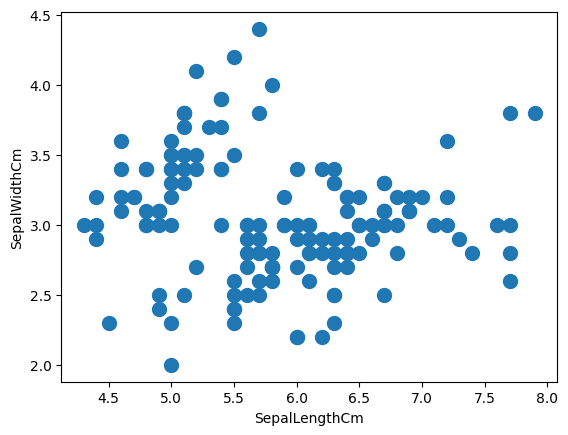

In [136]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

### Step 5 - Build K-Means Model

In [137]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

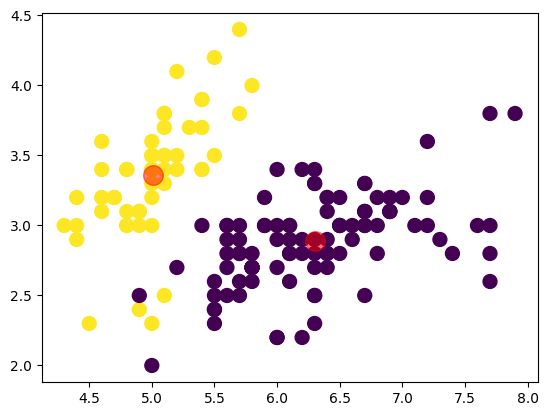

In [138]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### Step 6 - Model Evaluation

In [139]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


### Step 7 - Find The Best k Using Elbow Method


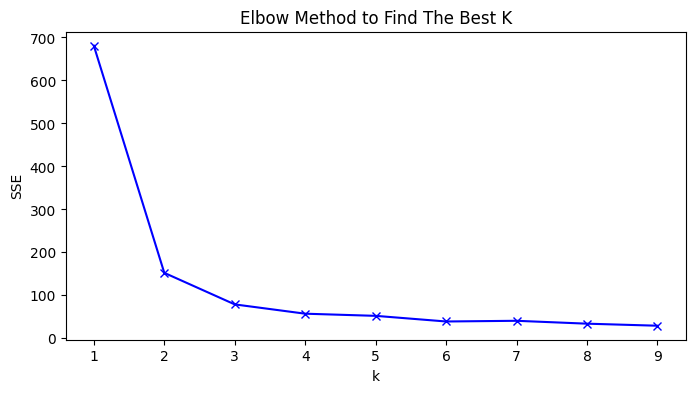

In [140]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

## Lab 2

### Step 0 - Import Libraries


In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 1 - Build Synthetic Data

In [142]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

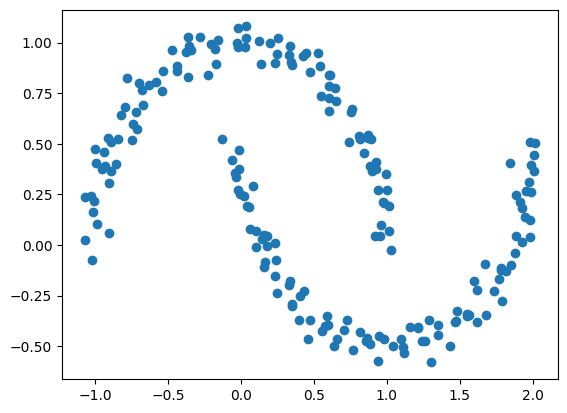

In [143]:
plt.scatter(X[:, 0], X[:, 1])

### Step 2 - Clustering Using K-Means


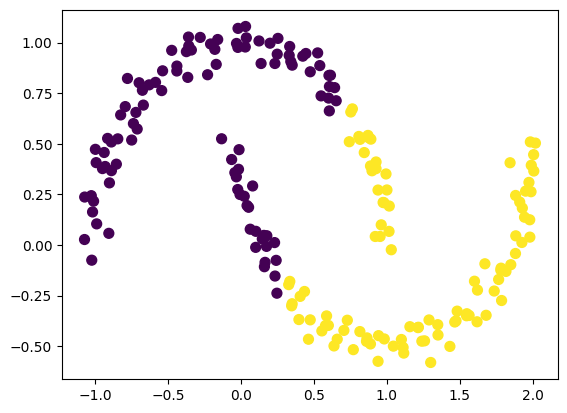

In [144]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

In [145]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


### Step 3 - Clustering Using DBSCAN

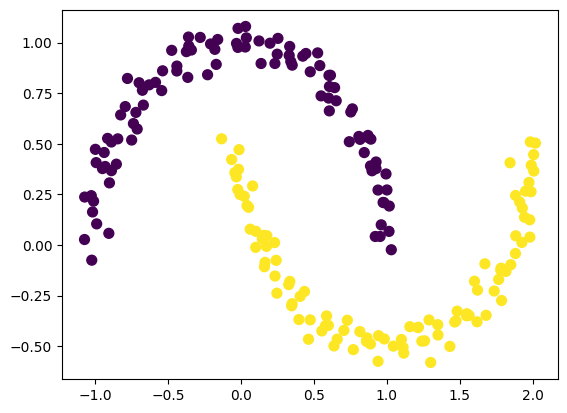

In [146]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

In [147]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

# Result: 0.32585318950197517

0.32585318950197517


In [148]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Result
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


## Lab 3

### Step 0 - Import Libraries


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 1 - Load The Data

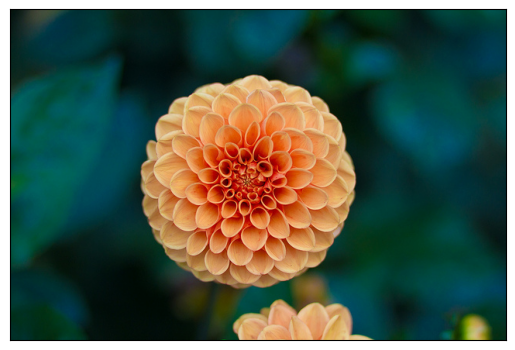

In [150]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

### Step 2 - Preprocessing

In [151]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


Step 3 - Check Color Distribution

In [152]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

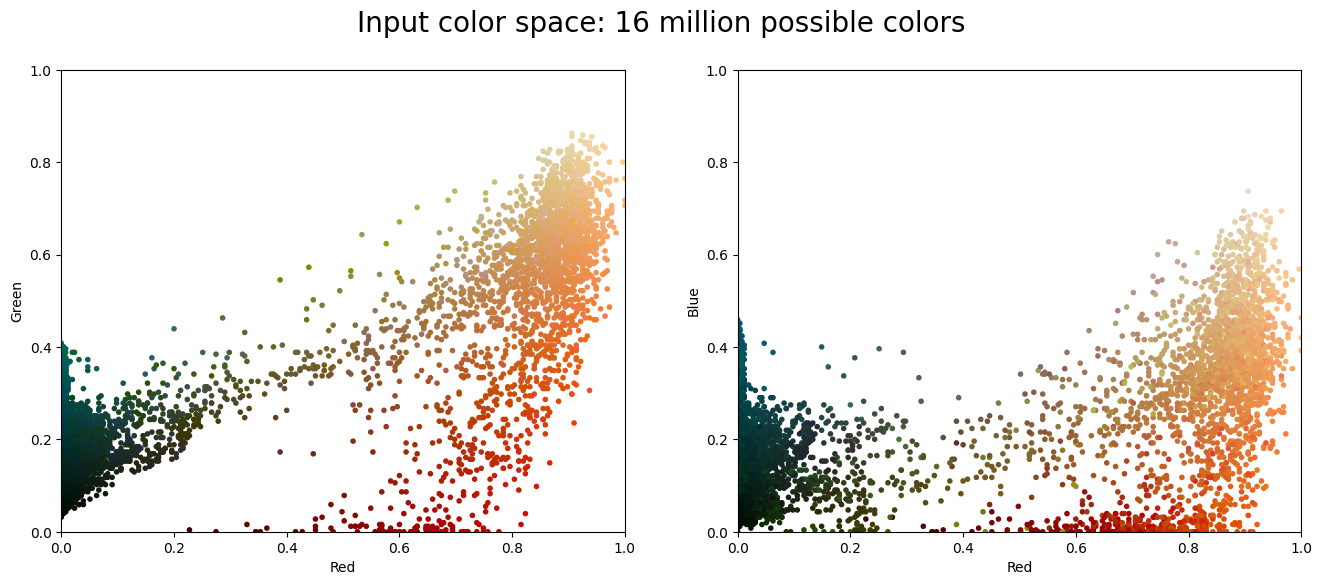

In [153]:
plot_pixels(data, title='Input color space: 16 million possible colors')

### Step 4 - Color Clustering Based on Similarity

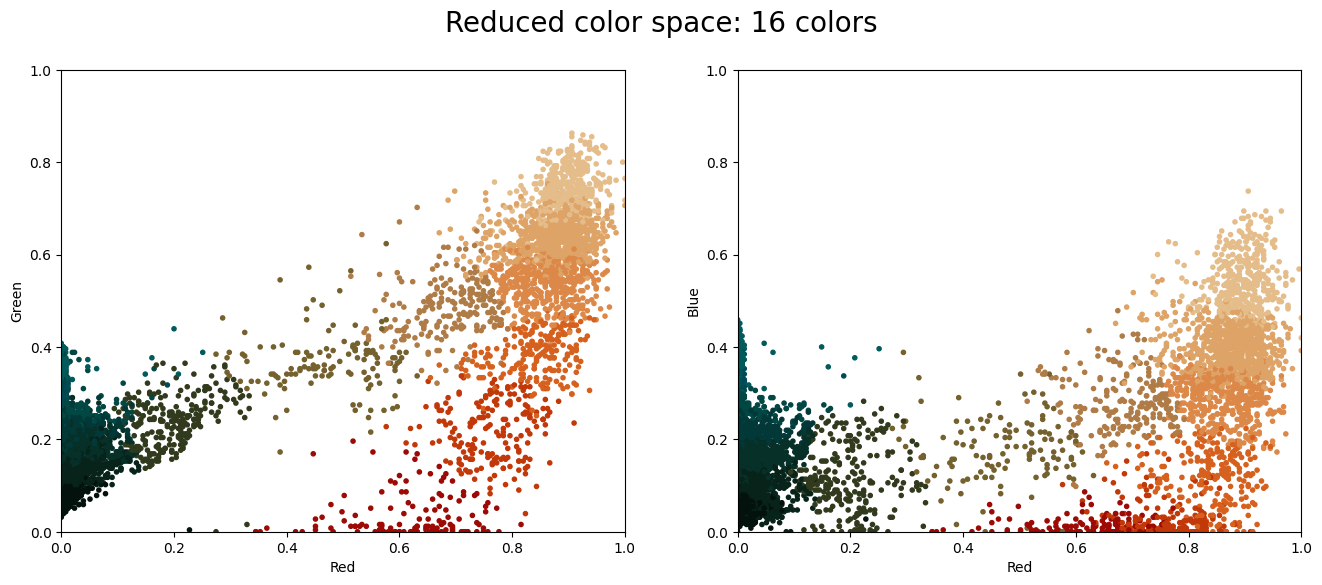

In [154]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

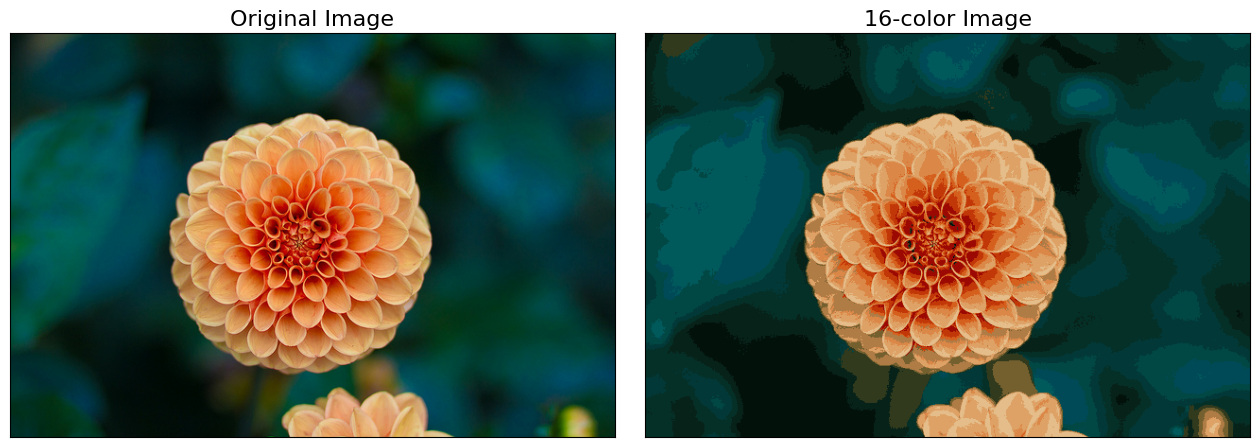

In [155]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

## Lab Assignment

In [171]:
# --- Data Preparation ---
# For demonstration purposes, we'll create a synthetic dataset.
# This mimics a real-world scenario with customer data.
# Replace this section with your own data loading code, e.g., df = pd.read_csv('your_data.csv')
from sklearn.datasets import make_blobs # Import make_blobs

features, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=42)
df = pd.DataFrame(features, columns=['Avg_Credit_Limit', 'Total_Credit_Cards'])

# Add some other variables for the DBSCAN part
df['Total_Visits_Bank'] = np.random.randint(1, 20, size=300)
df['Total_Online_Transactions'] = np.random.randint(5, 50, size=300)
df['Age'] = np.random.randint(22, 65, size=300)

print("--- First 5 rows of the dataset ---")
display(df.head()) # Use display for better formatting
print("\n" + "="*50 + "\n")

--- First 5 rows of the dataset ---


,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Online_Transactions,Age
0,-9.389561,6.303710,10,8,47
1,-9.870824,6.862056,4,10,30
2,-1.522144,7.549274,1,34,38
3,-7.140845,-5.561577,17,19,64
4,-11.284077,6.113819,8,22,49


#### 1. Create a scatter plot from the dataset using two variables, Avg_Credit_Limit and Total_Credit_Card. Determine whether the data distribution can be considered linear.

--- Analysis for Step 1 ---
Plot 1: Scatter Plot Analysis
Based on the scatter plot, we can observe the initial data distribution.
If the points form a cloud-like shape without a clear line pattern, the relationship is likely non-linear.
Our synthetic data shows distinct groups, suggesting clustering is possible, but not a single linear trend across all data.




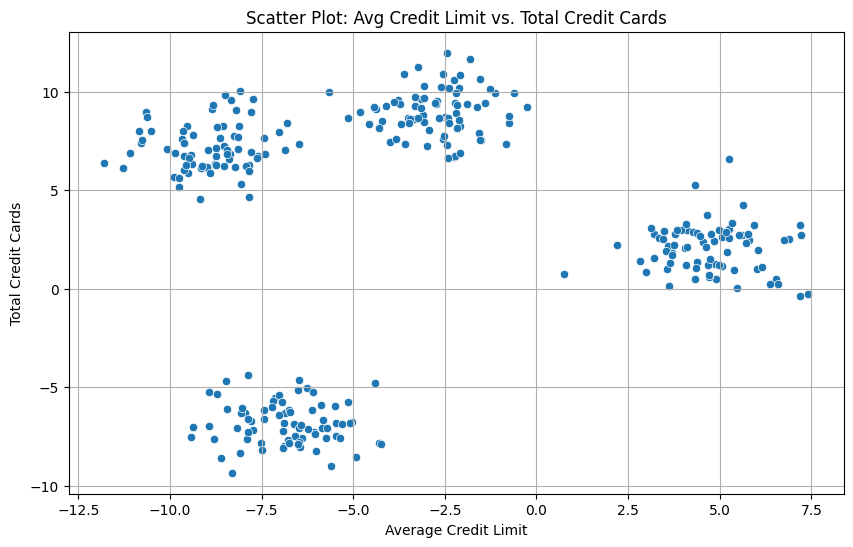

In [172]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Avg_Credit_Limit', y='Total_Credit_Cards')
plt.title('Scatter Plot: Avg Credit Limit vs. Total Credit Cards')
plt.xlabel('Average Credit Limit')
plt.ylabel('Total Credit Cards')
plt.grid(True)
print("--- Analysis for Step 1 ---")
print("Plot 1: Scatter Plot Analysis")
print("Based on the scatter plot, we can observe the initial data distribution.")
print("If the points form a cloud-like shape without a clear line pattern, the relationship is likely non-linear.")
print("Our synthetic data shows distinct groups, suggesting clustering is possible, but not a single linear trend across all data.\n")
print("="*50 + "\n")

#### 2. Build a clustering model using K-Means. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

--- Analysis for Step 2 ---
Plot 2: Elbow Method Chart
The Elbow Method helps us find the optimal number of clusters (k).
We look for the 'elbow' point, where the rate of decrease in inertia sharply slows down.
In the generated plot, this point is typically where adding another cluster doesn't provide much better modeling of the data.
For this synthetic dataset, the elbow is clearly visible at k=4. After this point, the curve flattens significantly.
Therefore, the optimal number of clusters is chosen as 4.




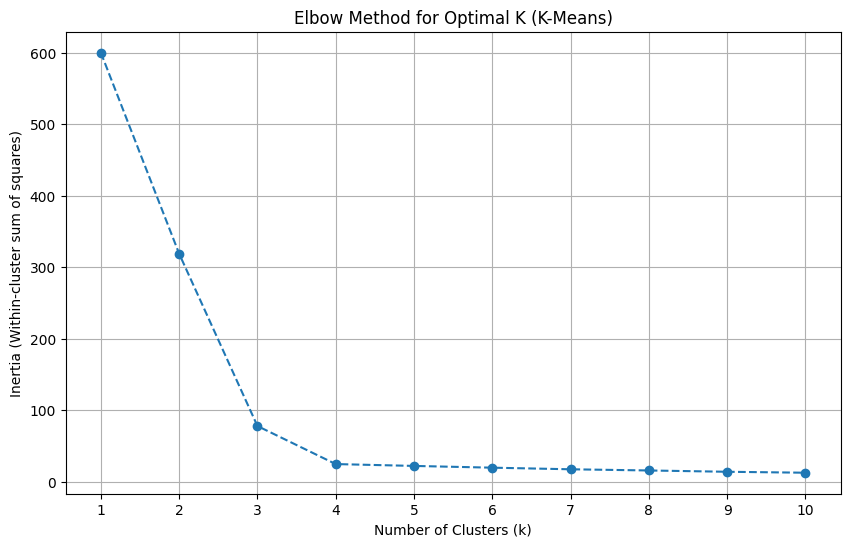

In [184]:
# Select only the variables for this analysis and scale them
# Scaling is crucial for distance-based algorithms like K-Means
X_kmeans = df[['Avg_Credit_Limit', 'Total_Credit_Cards']]
scaler_kmeans = StandardScaler()
X_kmeans_scaled = scaler_kmeans.fit_transform(X_kmeans)

# Calculate inertia for a range of k values
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_kmeans_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method chart
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid(True)

print("--- Analysis for Step 2 ---")
print("Plot 2: Elbow Method Chart")
print("The Elbow Method helps us find the optimal number of clusters (k).")
print("We look for the 'elbow' point, where the rate of decrease in inertia sharply slows down.")
print("In the generated plot, this point is typically where adding another cluster doesn't provide much better modeling of the data.")
print("For this synthetic dataset, the elbow is clearly visible at k=4. After this point, the curve flattens significantly.")
print("Therefore, the optimal number of clusters is chosen as 4.\n")
print("="*50 + "\n")

# Optimal k based on the elbow plot
OPTIMAL_K = 4

#### 3. Visualize the clustering results from the K-Means model using a scatter plot.

The model successfully grouped the data into 4 distinct clusters.
The red '.' markers indicate the final centroids (centers) for each cluster.




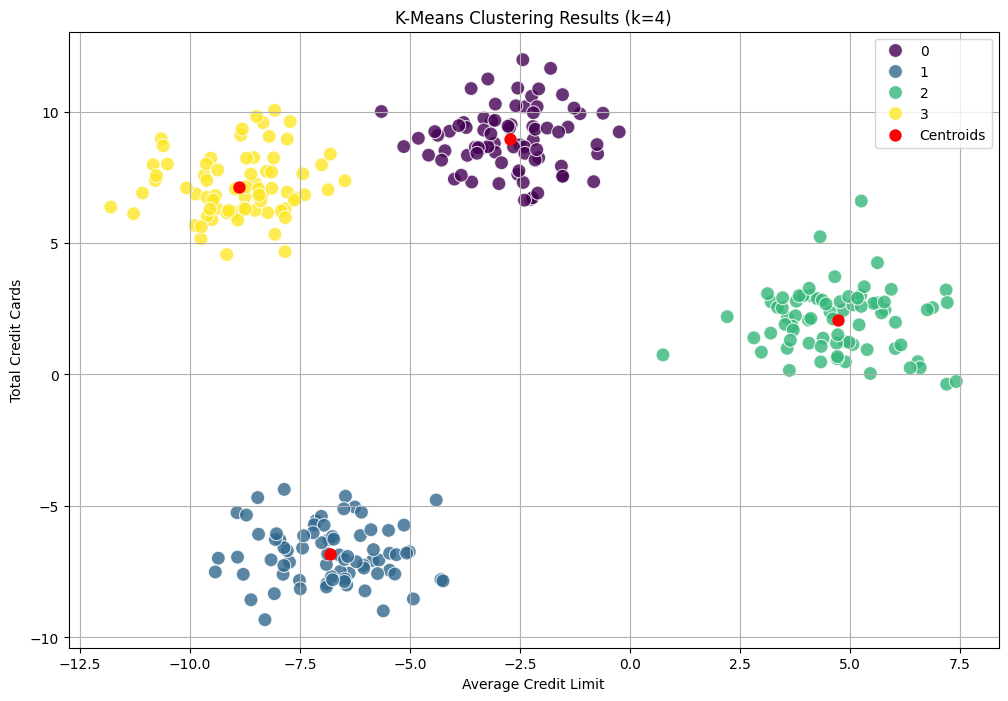

In [185]:
# Build the final K-Means model with the optimal k
kmeans_final = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans_final.fit_predict(X_kmeans_scaled)

# Get the cluster centers
centers = scaler_kmeans.inverse_transform(kmeans_final.cluster_centers_)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Avg_Credit_Limit', y='Total_Credit_Cards', hue='kmeans_cluster', palette='viridis', s=100, alpha=0.8, legend='full')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='.', label='Centroids')
plt.title(f'K-Means Clustering Results (k={OPTIMAL_K})')
plt.xlabel('Average Credit Limit')
plt.ylabel('Total Credit Cards')
plt.legend()
plt.grid(True)
print(f"The model successfully grouped the data into {OPTIMAL_K} distinct clusters.")
print("The red '.' markers indicate the final centroids (centers) for each cluster.\n")
print("="*50 + "\n")


#### 4. Build a clustering model using DBSCAN with all available variables.

In [178]:
# We will use all available numeric variables for DBSCAN
X_dbscan = df.select_dtypes(include=np.number).drop(columns=['kmeans_cluster'])
scaler_dbscan = StandardScaler()
X_dbscan_scaled = scaler_dbscan.fit_transform(X_dbscan)

# Build DBSCAN model. The parameters `eps` and `min_samples` often require tuning.
# We'll start with common default values.
dbscan = DBSCAN(eps=0.7, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_dbscan_scaled)

# Analyze DBSCAN results
n_clusters_dbscan = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)

print("--- Analysis for Step 4 ---")
print("DBSCAN Model Results:")
print(f"Estimated number of clusters: {n_clusters_dbscan}")
print(f"Estimated number of noise points (outliers): {n_noise}\n")
print("DBSCAN is a density-based algorithm. It groups together points that are closely packed,")
print("marking as outliers points that lie alone in low-density regions (label -1).\n")
print("="*50 + "\n")

--- Analysis for Step 4 ---
DBSCAN Model Results:
Estimated number of clusters: 10
Estimated number of noise points (outliers): 243

DBSCAN is a density-based algorithm. It groups together points that are closely packed,
marking as outliers points that lie alone in low-density regions (label -1).




#### 5. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

In [179]:
print("--- Analysis for Step 5 ---")
print("This question contains a common misconception.")
print("The Elbow Method is NOT applicable to DBSCAN.")
print("Why? The Elbow Method is designed for partitioning algorithms like K-Means, where you must specify the number of clusters (k) beforehand.")
print("DBSCAN, on the other hand, is a density-based algorithm. It determines the number of clusters automatically based on its parameters: `eps` (the maximum distance between two samples for one to be considered as in the neighborhood of the other) and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point).")
print("Therefore, instead of finding 'k', one optimizes DBSCAN by tuning `eps` and `min_samples` to get meaningful clusters.")
print(f"As calculated in the previous step, our DBSCAN model found {n_clusters_dbscan} clusters automatically.\n")
print("="*50 + "\n")



--- Analysis for Step 5 ---
This question contains a common misconception.
The Elbow Method is NOT applicable to DBSCAN.
Why? The Elbow Method is designed for partitioning algorithms like K-Means, where you must specify the number of clusters (k) beforehand.
DBSCAN, on the other hand, is a density-based algorithm. It determines the number of clusters automatically based on its parameters: `eps` (the maximum distance between two samples for one to be considered as in the neighborhood of the other) and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point).
Therefore, instead of finding 'k', one optimizes DBSCAN by tuning `eps` and `min_samples` to get meaningful clusters.
As calculated in the previous step, our DBSCAN model found 10 clusters automatically.




#### 6. Calculate the silhouette score and Davies–Bouldin Index (DBI) for the DBSCAN model.

In [180]:
print("--- Analysis for Step 6 ---")
print("Calculating evaluation metrics for DBSCAN...")

# Important: Evaluation metrics like Silhouette Score and DBI cannot handle 'noise' points (label -1).
# We must first filter out these points before calculation.
if n_clusters_dbscan > 1:
    # Select only the points that were assigned to a cluster
    mask = df['dbscan_cluster'] != -1
    X_clustered = X_dbscan_scaled[mask]
    labels_clustered = df['dbscan_cluster'][mask]

    # Calculate scores
    silhouette = silhouette_score(X_clustered, labels_clustered)
    dbi = davies_bouldin_score(X_clustered, labels_clustered)

    print(f"Silhouette Score: {silhouette:.4f}")
    print("  - Interpretation: Ranges from -1 to 1. A score closer to 1 indicates that clusters are dense and well-separated.")
    print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")
    print("  - Interpretation: The lower the score, the better the clustering. A score of 0 indicates the best possible clustering.")
else:
    print("Cannot calculate Silhouette Score or DBI because DBSCAN found fewer than 2 clusters.")
    print("This can happen if the `eps` value is too small or `min_samples` is too high.")
print("\n" + "="*50)




--- Analysis for Step 6 ---
Calculating evaluation metrics for DBSCAN...
Silhouette Score: 0.6142
  - Interpretation: Ranges from -1 to 1. A score closer to 1 indicates that clusters are dense and well-separated.
Davies-Bouldin Index (DBI): 0.4957
  - Interpretation: The lower the score, the better the clustering. A score of 0 indicates the best possible clustering.



<Figure size 640x480 with 0 Axes>